In [1]:
import importlib
import sys
from tqdm import tqdm
import  os
import cv2
import glob
from datetime import datetime 
# Add the directories to the sys.path
dir_path = "C://Users//jony//Programming//Python//Anubis//anubis//"
 # insert your directory path
sys.path.append(dir_path + "Osiris//processing//python")
sys.path.append(dir_path + "tools")

import Analysis_tools as ATools
import proAnubis_Analysis_Tools
import Visual_tools as VTools
import Reconstruction_tools as RTools
import mplhep as hep
import pickle
import Timing_tools as TTools
import overview
import rawFileReader
hep.style.use([hep.style.ATLAS])

# Specify the directory
#data_list = sorted([f for f in os.listdir("data//reset") if os.path.isfile(os.path.join("data//reset", f))], reverse=True) ##all files in data directory sorted from the newest to the oldest

#file_path = list(map(lambda p: dir_path+"data//reset//"+p, data_list)) # insert your file
#print(file_path)

In [ ]:
importlib.reload(rawFileReader) # Reload fReader
importlib.reload(proAnubis_Analysis_Tools)
importlib.reload(VTools)

file_name = 'C://Users//jony//Programming//Python//Anubis//anubis//data//proAnubis_240815_1759.raw'
storage_name = "weird_data.pkl"

start = "2024-08-15 17:24:22"
end = "2024-08-15 17:24:23"


chunks, times, fReader = overview.get_chunks(file_name, start= start, end = end)

In [ ]:
with open(storage_name, "wb") as outp:
    pickle.dump([chunks, times], outp)

In [7]:
importlib.reload(overview)
import matplotlib.pyplot as plt

storage_name = "data/chunks_hv4.pkl"
with open(storage_name, "rb") as inp:
    total_chunks = pickle.load(inp)
print("Loaded chunks")

Loaded chunks


In [14]:
len(total_chunks) #chunks

179

In [ ]:
#Create the images
total_chunks = total_chunks[-1][-1] #chunks

max_process_event_chunk = 1

processedEvents = 0
interval = 50
reconstructor = proAnubis_Analysis_Tools.Reconstructor(total_chunks[0], processedEvents)
with tqdm(total=max_process_event_chunk*interval, desc="Processing Events", unit='Events') as pbar:
    while processedEvents < max_process_event_chunk:
        processedEvents += 1
        for evt_num, evt in enumerate(total_chunks[processedEvents]):
            #[print(hit) for hit in VTools.all_hits_event(evt)]
            maps = VTools.hitHeatMap(evt)
            for rpc in range(6):
                plt.imshow(maps[rpc], interpolation='nearest')
                plt.title(f'Event {evt_num} RPC {rpc}')
                plt.savefig(f'video/images_video/{processedEvents*100+10*evt_num+rpc}.png')
            pbar.update(1)

In [9]:
#Compose the video
image_folder = 'video/images_video'
images = [img for img in os.listdir(image_folder)[1::6] if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape


video_name = f'video/one_chunk.mp4'
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 8, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

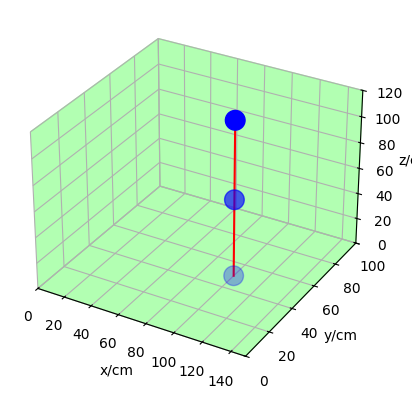

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the coordinates for the points
x = [100, 100, 100]
y = [50, 50, 50]
z = [0, 60, 120]

# Plot the points as blue spheres
ax.scatter(x, y, z, color='blue', s=200)

# Connect the points with a red line
ax.plot(x, y, z, color='red')

# Set axis labels
ax.set_xlabel('x/cm')
ax.set_ylabel('y/cm')
ax.set_zlabel('z/cm')

# Set axis limits
ax.set_xlim([0, 150])
ax.set_ylim([0, 100])
ax.set_zlim([0, 120])

# Set background color (optional)
ax.xaxis.set_pane_color((0.5, 1, 0.5, 0.6)) # Greenish
ax.yaxis.set_pane_color((0.5, 1, 0.5, 0.6)) # Greenish
ax.zaxis.set_pane_color((0.5, 1, 0.5, 0.6)) # Greenish

# Show the plot
plt.show()


In [37]:
importlib.reload(VTools)
importlib.reload(overview)
file_name = 'proAnubis_240815_1759.raw'
for i in range(10,20):
    event = overview.get_chunks(file_name, max_process_event = 1)[0][0][i]
    VTools.event_3d_plot(event)

Initial time 2024-08-15 16:59:49.312501 1723737589.312501


Processing Chunks proAnubis_240815_1759.raw: 1Chunks [00:00, 123.70Chunks/s]

Ending time: 2024-08-15 16:59:49.329438
Number of chunks: 1
[[0, 203.125, [[[[[0, 47, 198.4375, False]]], [[[0, 13, 203.90625, True]]]], [[[[1, 48, 194.53125, False]]], [[[1, 13, 203.90625, True]]]], [[], [[[2, 13, 205.46875, True]]]], [[[[3, 49, 195.3125, False]]], [[[3, 18, 203.90625, True], [3, 19, 203.125, True]]]], [[[[4, 50, 200.0, False]]], [[[4, 23, 207.03125, True]]]], [[], []]]]]


Initial time 2024-08-15 16:59:49.312501 1723737589.312501


Processing Chunks proAnubis_240815_1759.raw: 1Chunks [00:00, 73.69Chunks/s]

Ending time: 2024-08-15 16:59:49.329438
Number of chunks: 1


[[0, 194.53125, [[[[[0, 37, 185.15625, False]]], [[[0, 24, 194.53125, True]]]], [[[[1, 37, 185.9375, False]]], [[[1, 24, 195.3125, True]]]], [[[[2, 37, 182.8125, False]]], [[[2, 24, 196.09375, True]]]], [[[[3, 39, 185.9375, False], [3, 40, 192.1875, False]]], [[[3, 22, 197.65625, True]]]], [[[[4, 40, 189.84375, False]]], [[[4, 20, 200.0, True]]]], [[[[5, 40, 186.71875, False]]], []]]]]
Initial time 2024-08-15 16:59:49.312501 1723737589.312501


Processing Chunks proAnubis_240815_1759.raw: 1Chunks [00:00, 100.58Chunks/s]

Ending time: 2024-08-15 16:59:49.329438
Number of chunks: 1
[[0, 200.78125, [[[], []], [[], []], [[], []], [[[[3, 17, 181.25, False]]], [[[3, 30, 202.34375, True], [3, 31, 200.78125, True]]]], [[[[4, 21, 189.84375, False]]], [[[4, 26, 202.34375, True]]]], [[[[5, 21, 185.15625, False]]], [[[5, 26, 202.34375, True]]]]]]]


Initial time 2024-08-15 16:59:49.312501 1723737589.312501


Processing Chunks proAnubis_240815_1759.raw: 1Chunks [00:00, 61.32Chunks/s]

Ending time: 2024-08-15 16:59:49.329438
Number of chunks: 1


[[0, 208.59375, [[[[[0, 32, 199.21875, False]]], [[[0, 12, 208.59375, True]]]], [[[[1, 32, 199.21875, False]]], [[[1, 12, 210.15625, True]]]], [[[[2, 32, 196.875, False]]], [[[2, 12, 209.375, True]]]], [[[[3, 37, 201.5625, False]]], [[[3, 6, 211.71875, True]]]], [[[[4, 40, 207.03125, False]]], [[[4, 1, 215.625, True], [4, 2, 217.1875, True]]]], [[], [[[5, 1, 214.84375, True]]]]]]]


KeyboardInterrupt: 

: 